# Hypothesis Testing
## Imoprting Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statistics
import warnings

df= pd.read_csv("data.csv")
df.head()


C:\Users\intwa\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4,24,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


### Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285008 entries, 0 to 285007
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        285008 non-null  int64  
 1   Year                          285008 non-null  int64  
 2   Department Title              285008 non-null  object 
 3   Payroll Department            231463 non-null  float64
 4   Record Number                 285008 non-null  object 
 5   Job Class Title               285008 non-null  object 
 6   Employment Type               285008 non-null  object 
 7   Hourly or Event Rate          263987 non-null  object 
 8   Projected Annual Salary       285008 non-null  object 
 9   Q1 Payments                   285008 non-null  object 
 10  Q2 Payments                   285008 non-null  object 
 11  Q3 Payments                   285008 non-null  object 
 12  Q4 Payments                   285008 non-nul

In [6]:
df.isnull().sum()

Row ID                              0
Year                                0
Department Title                    0
Payroll Department              53545
Record Number                       0
Job Class Title                     0
Employment Type                     0
Hourly or Event Rate            21021
Projected Annual Salary             0
Q1 Payments                         0
Q2 Payments                         0
Q3 Payments                         0
Q4 Payments                         0
Payments Over Base Pay              0
% Over Base Pay                     0
Total Payments                      0
Base Pay                            0
Permanent Bonus Pay                 0
Longevity Bonus Pay                 0
Temporary Bonus Pay                 0
Lump Sum Pay                    42264
Overtime Pay                      434
Other Pay & Adjustments             0
Other Pay (Payroll Explorer)        0
MOU                             21021
MOU Title                       21021
FMS Departme

## Data Preparation

In [17]:
df = df[pd.notnull(df['Payroll Department'])]

In [8]:
df.corr()

,Row ID,Year,Payroll Department,FMS Department,Job Class
Row ID,1.000000,0.958912,0.162959,0.161798,0.021216
Year,0.958912,1.000000,0.005469,0.008489,0.016790
Payroll Department,0.162959,0.005469,1.000000,0.906477,0.045272
FMS Department,0.161798,0.008489,0.906477,1.000000,0.020020
Job Class,0.021216,0.016790,0.045272,0.020020,1.000000


### Year-Row ID correlated and Payroll Department- FMS Department Correlated

In [9]:
df.drop(['Row ID','FMS Department'], axis=1)

,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,Q2 Payments,...,MOU,MOU Title,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
1,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,$13859.93,...,24.0,POLICE OFFICERS UNIT,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,$23479.20,...,24.0,POLICE OFFICERS UNIT,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,$18560.38,...,12.0,SUPV BLUE COLLAR,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,$17313.10,...,3.0,CLERICAL UNIT,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,2014,Airports (LAWA),101.0,4237826094,Custodian - Airports,Full Time,$22.95,$47911.51,$13493.87,$14599.61,...,15.0,SERVICE EMPLOYEES UNIT,3156,A,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/3156.pdf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274156,2016,Zoo,8702.0,1569372100,Zoo Veterinarian II,Part Time,$49.50,$103356.00,$0.00,$1262.25,...,10,Professional Medical,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf
274157,2016,Zoo,8702.0,583720037,Zoo Veterinarian II,Part Time,$49.50,$103356.00,$24195.60,$5865.75,...,10,Professional Medical,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf
274158,2016,Zoo,8702.0,2795932236,Zoo Veterinarian II,Part Time,$50.86,$106198.29,$4475.79,$6637.38,...,10,Professional Medical,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf
274159,2016,Zoo,8702.0,3627379422,Zoo Veterinarian II,Part Time,$49.50,$103356.00,$0.00,$2450.25,...,10,Professional Medical,2367,2,$0.00,$0.00,$0.00,$0.00,City,http://per.lacity.org/perspecs/2367.pdf


### Removing dollar sign and converting obj type into float

In [3]:
def remove_design(col_name_list,df):
    for i in col_name_list:
        df[i] = df[i].str.replace('$','')
        df[i] = df[i].astype("float")
col_name_list = ['Projected Annual Salary', 'Q1 Payments', 'Q2 Payments','Q3 Payments', 'Q4 Payments', 'Payments Over Base Pay',
          'Total Payments','Base Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost' ]
remove_design(col_name_list,df)

<ipython-input-3-15fd0dbc3151>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df[i] = df[i].str.replace('$','')


In [11]:
df.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,52450.56,11331.00,...,POLICE OFFICERS UNIT,70,2214,A,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,89303.76,20036.32,...,POLICE OFFICERS UNIT,70,2214,2,11651.40,898.08,191.04,12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,60028.96,15793.88,...,SUPV BLUE COLLAR,42,3184,0,10710.24,405.24,11.40,11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,64553.13,14700.00,...,CLERICAL UNIT,82,1368,0,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/1368.pdf
6,59695,2014,Airports (LAWA),101.0,4237826094,Custodian - Airports,Full Time,$22.95,47911.51,13493.87,...,SERVICE EMPLOYEES UNIT,4,3156,A,11000.40,409.68,11.40,11421.48,City,http://per.lacity.org/perspecs/3156.pdf


### Renaming

In [4]:
df.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
df.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)


df = df[df.Annual_sal != 0]
df = df[df.Base_Pay != 0]


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228390 entries, 1 to 274160
Data columns (total 35 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Row ID                        228390 non-null  int64  
 1   Year                          228390 non-null  int64  
 2   Department Title              228390 non-null  object 
 3   Payroll Department            228390 non-null  float64
 4   Record Number                 228390 non-null  object 
 5   Job Class Title               228390 non-null  object 
 6   Employment Type               228390 non-null  object 
 7   Hourly or Event Rate          228390 non-null  object 
 8   Annual_sal                    228390 non-null  float64
 9   Q1 Payments                   228390 non-null  float64
 10  Q2 Payments                   228390 non-null  float64
 11  Q3 Payments                   228390 non-null  float64
 12  Q4 Payments                   228390 non-nul

C:\Users\intwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\intwa\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Base_Pay', ylabel='Density'>

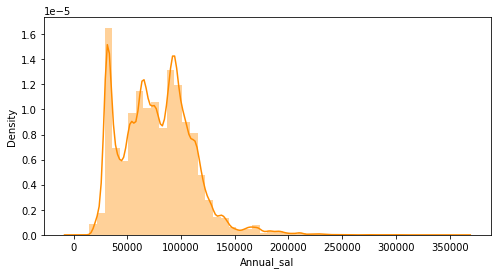

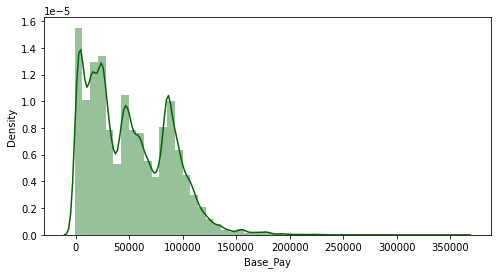

In [8]:
plt.figure(figsize = (8,4))
sns.distplot(df.Annual_sal,color = 'darkorange')
plt.figure(figsize = (8,4))
sns.distplot(df.Base_Pay, color = 'darkgreen')

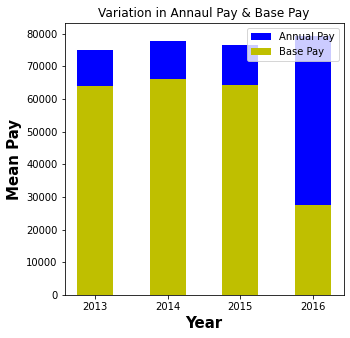

In [15]:
df_2013 = df[df.Year == 2013]
df_2014 = df[df.Year == 2014]
df_2015 = df[df.Year ==2015]
df_2016 = df[df.Year ==2016]


plt.figure(figsize =(5,5))

plt.bar(['2013','2014','2015','2016'], [np.mean(df_2013['Annual_sal']),np.mean(df_2014['Annual_sal']),np.mean(df_2015['Annual_sal']),np.mean(df_2016['Annual_sal'])], label='Annual Pay', color= 'b',width=0.5)
plt.bar(['2013','2014','2015','2016'], [np.mean(df_2013['Base_Pay']),np.mean(df_2014['Base_Pay']),np.mean(df_2015['Base_Pay']),np.mean(df_2016['Base_Pay'])], label='Base Pay', color= 'y',width=0.5)
plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Mean Pay', fontweight ='bold', fontsize = 15)
plt.title('Variation in Annaul Pay & Base Pay')
plt.legend()
plt.show()


In [16]:
df.apply(lambda x : x.nunique())

Row ID                          228390
Year                                 4
Department Title                    57
Payroll Department                 182
Record Number                    89721
Job Class Title                   1392
Employment Type                      2
Hourly or Event Rate              4838
Annual_sal                        8517
Q1 Payments                     132029
Q2 Payments                     129340
Q3 Payments                     102682
Q4 Payments                      98169
Payments Over Base Pay          160705
% Over Base Pay                  13184
Total Payments                  204596
Base_Pay                        130027
Permanent Bonus Pay              56639
Longevity Bonus Pay              33266
Temporary Bonus Pay              21085
Lump Sum Pay                     22151
Overtime Pay                     97986
Other Pay & Adjustments          38063
Other Pay (Payroll Explorer)    126728
MOU                                 84
MOU Title                

### Scaling

In [10]:
from sklearn.preprocessing import scale
num_scaled = scale(df[['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments', 'Payments Over Base Pay', 'Total Payments', 'Base_Pay', 'Permanent Bonus Pay', 'Longevity Bonus Pay', 'Temporary Bonus Pay', 'Overtime Pay', 'Other Pay & Adjustments','Other Pay (Payroll Explorer)', 'Average Health Cost','Average Dental Cost','Average Basic Life','Average Benefit Cost']],copy=False)
num_scaled


array([[-0.7535812 , -0.62541992, -0.17013536, ...,  1.36372385,
         1.59189865,  0.59832384],
       [ 0.35676113,  0.02270345,  0.48696635, ...,  1.36372385,
         1.59189865,  0.59832384],
       [-0.52525318, -0.2931522 ,  0.15095696, ..., -0.20426411,
        -0.60326938,  0.27468941],
       ...,
       [ 0.86577288, -1.13579998, -0.6635148 , ..., -1.49354956,
        -0.7425753 , -1.9569369 ],
       [ 0.78013812, -1.46902887, -0.94954173, ..., -1.49354956,
        -0.7425753 , -1.9569369 ],
       [ 0.78013812, -1.31424438, -0.7618744 , ..., -1.49354956,
        -0.7425753 , -1.9569369 ]])

In [11]:
df.groupby('Year')['Annual_sal'].describe()


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2013,46394.0,74917.250568,32482.466873,20003.04,49918.2075,73515.87,95212.80,360743.76
2014,45619.0,77638.194367,32835.063205,1.04,52847.2800,76758.53,98344.80,360743.76
2015,48063.0,76401.008000,33943.842879,1.04,50138.1000,74813.04,97655.76,360743.76
2016,88314.0,79286.681083,33217.213326,18792.00,54300.0100,77561.89,100307.52,345731.04


### Sampling

In [12]:
sample_1 = df[df['Year']==2013]
sample_2 = df[df['Year']==2014]
sample_3 = df[df['Year']==2015]
sample_4 = df[df['Year']==2016]

print(sample_1.shape, sample_2.shape)

(46394, 35) (45619, 35)


In [13]:
#make equal number of samples
sample_1=sample_1.sample(45619)
print(sample_1.shape, sample_2.shape)

(45619, 35) (45619, 35)


#Before directly jumping for hypothesis testing we have to check for different assumptions related to the kind of
hypothesis test we want to perform.
##Assumption for T-Test
1. The variances of the 2 samples are equal(We will use Levene's test to check this assumption).
2. The distrubtion of the residuals b/w the two groups should follow the normal distribution. We can plot
histogram and see whether the distribution follows the normal distribution or not. We can also plot a Q-Q
plot. We can check the normality using shapiro-wilks test as well.

#Levene's test to check whether the variances of the two group are same.
#H0 : Variances are same
#H1 : Variances are not same.
#Alpha = 0.05
#if p-value > alpha (Cannot reject H0)
#if p-value < alpha (Accept null hypothesis)

### Levene's Test

In [14]:
alpha = 0.05
Stats, Pvalue = stats.levene(sample_1['Annual_sal'], sample_2['Annual_sal'])
print(f' Test Statistics : {Stats} \n Alpha : {alpha} \n P-value : {Pvalue}')
if Pvalue  > alpha:
    print('Variances are same accept null hypothesis ')
else:
    print('Variances are not same reject not null hypothesis ')
    

 Test Statistics : 0.7188969972368765 
 Alpha : 0.05 
 P-value : 0.3965081768704949
Variances are same accept null hypothesis 


Here we have got 2 things:
1. Test Statistics
2. And p-value assosciated with test stastics. We can see that p-value(0.4165) > alpha(0.05). So we fail to reject
the null hypothesis. Variances of the 2 samples are equal.
###Check for normality
Take the difference between two samples and scale it to check the normality of the residuals.

### Plotting Histogram and Q-Q Plot

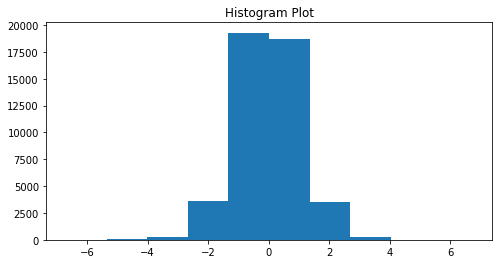

In [18]:
diff = scale(np.array(sample_1['Annual_sal']-np.array(sample_2['Annual_sal'])))
plt.figure(figsize=(8,4))
plt.hist(diff)
plt.title('Histogram Plot')
plt.show()

The distribution seems very close to normal distribution. Let's check other methods to check the normality of the
residuals.
Q-Q plot, Generates the a probability of sample data against the quantiles of theoretical distributions.

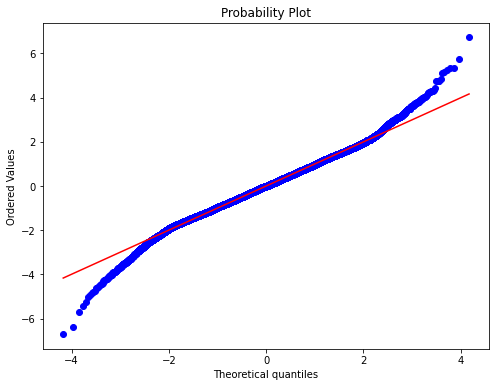

In [16]:
# q-q plot
plt.figure(figsize=(8,6))
stats.probplot(diff,plot =plt, dist='norm')
plt.show()

### Shapiro-Wilk test - checking normality analytically

In [24]:

#H0 : Normally Distributes
#h1 : Not Normally Distributed
alpha = 0.05
statistic, p_value = stats.shapiro(diff)
if p_value > alpha:
    print(f'Accept Null Hypothesis p-value: {p_value}')
else:
    print(f'Reject Null Hypothesis p-value: {p_value}')
    

Reject Null Hypothesis p-value: 1.0729137342718267e-33


C:\Users\intwa\anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Not normally distributed so cannot apply T-test

# Comparing Means

## Student's t-test

In [211]:
print(sample_3.shape, sample_4.shape)

(48063, 35) (48063, 35)


In [212]:
population_mean=np.mean(sample_4['Base_Pay'])
sample_4= sample_4.sample(48063)
print(sample_4.shape, sample_3.shape)

(48063, 35) (48063, 35)


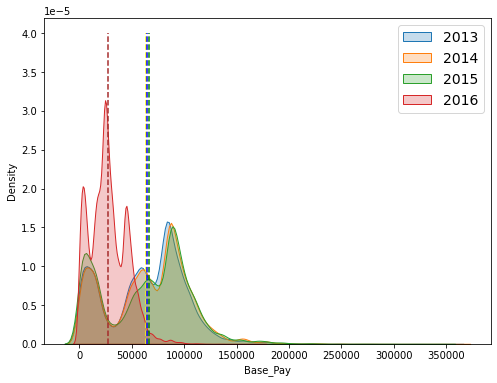

In [213]:
plt.figure(figsize=(8,6))
sns.kdeplot(sample_1['Base_Pay'], shade=True)
sns.kdeplot(sample_2['Base_Pay'], shade=True)
sns.kdeplot(sample_3['Base_Pay'], shade=True)
sns.kdeplot(sample_4['Base_Pay'], shade=True)
plt.legend(['2013','2014','2015','2016'], fontsize=14)
plt.vlines(x= np.mean(sample_1['Base_Pay']),ymin=0, ymax=0.00004 ,color='yellow', linestyle='--')
plt.vlines(x= np.mean(sample_2['Base_Pay']), ymin=0, ymax=0.00004, color='green', linestyle='--')

plt.vlines(x= np.mean(sample_3['Base_Pay']),ymin=0, ymax=0.00004 ,color='blue', linestyle='--')
plt.vlines(x= np.mean(sample_4['Base_Pay']), ymin=0, ymax=0.00004, color='brown', linestyle='--')
plt.show()


2013-2015 there is no major change in mean, so comparing between 2015 & 2016

In [215]:
std_err = np.std(sample_3['Base_Pay'])/np.sqrt(48063)
z_stat = (np.mean(sample_4['Base_Pay'])-np.mean(sample_3['Base_Pay']))/std_err

print("Standard error of the mean: ", std_err)
print("Z-Statistic: ",z_stat)

Standard error of the mean:  187.1352511597253
Z-Statistic:  -197.41562010482323


In [217]:
alpha = 0.05
rejection_threshold = stats.norm.ppf(1-alpha)


In [219]:
if z_stat > rejection_threshold:
    print("We reject the NULL Hypothesis: Base Pay is not increasing in 2016")
else:
    print("We cannot reject the NULL Hypothesis: Base Pay is increasing in 2016")
    

We cannot reject the NULL Hypothesis: Base Pay is increasing in 2016


## Student's Independent T-test

In [25]:
def independent_ttest(data1, data2, alpha=0.05):
    import scipy.stats as st
    # calculate means
    mean1, mean2 = np.mean(data1), np.mean(data2)
    # calculate standard errors
    se1, se2 = st.sem(data1), st.sem(data2)
    # standard error on the difference between the samples
    sed = np.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    # degrees of freedom
    df = len(data1) + len(data2) - 2
    # calculate the critical value
    cv = st.t.ppf(1.0 - alpha, df)
    # calculate the p-value
    p = (1.0 - st.t.cdf(abs(t_stat), df)) * 2.0
    # return everything
    return t_stat, df, cv, p


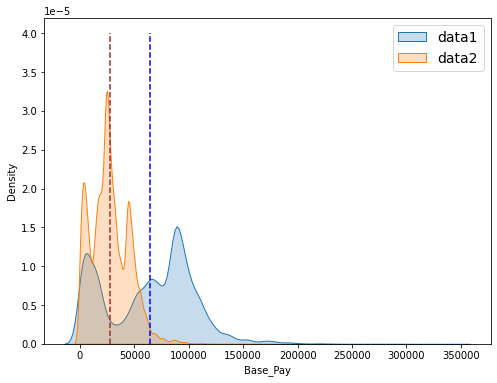

In [34]:
data1 = sample_3['Base_Pay']
data2 = sample_4['Base_Pay']

plt.figure(figsize=(8,6))
sns.kdeplot(data1, shade=True)
sns.kdeplot(data2, shade=True)
plt.legend(['data1','data2'], fontsize=14)
plt.vlines(x=data1.mean(),ymin=0,ymax=0.00004,color='blue',linestyle='--')
plt.vlines(x=data2.mean(),ymin=0,ymax=0.00004,color='brown',linestyle='--')
plt.show()

In [36]:
# calculate the t test
alpha = 0.05
t_stat, df, cv, p = independent_ttest(data1, data2, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
print()
# interpret via critical value
if abs(t_stat) <= cv:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
    print('Fail to reject null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


t=188.181, df=136375, cv=1.645, p=0.000

Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [41]:
'''One-way ANOVA between multiple groups
groups: A dictionary object of trial groups'''
def multi_anova(groups,alpha=0.05):
    from itertools import combinations
    import scipy.stats as st
    list_anova = list(combinations(list(groups.keys()),2))
    for comb in list_anova:
        _,p=st.f_oneway(groups[comb[0]],groups[comb[1]])
        if p>0.05:
            print("\nANOVA fails to reject the hypothesis of equal mean for {} and {}".format(comb[0],comb[1]))
        else:
            print("\nWe reject the hypothesis of equal mean for {} and {} as per ANOVA test result".format(comb[0],comb[1]))
            
            
groups = {'sample_1':sample_1['Base_Pay'],'sample_2':sample_2['Base_Pay'],'sample_3':sample_3['Base_Pay'],'sample_4':sample_4['Base_Pay']}
multi_anova(groups)


We reject the hypothesis of equal mean for sample_1 and sample_2 as per ANOVA test result

ANOVA fails to reject the hypothesis of equal mean for sample_1 and sample_3

We reject the hypothesis of equal mean for sample_1 and sample_4 as per ANOVA test result

We reject the hypothesis of equal mean for sample_2 and sample_3 as per ANOVA test result

We reject the hypothesis of equal mean for sample_2 and sample_4 as per ANOVA test result

We reject the hypothesis of equal mean for sample_3 and sample_4 as per ANOVA test result


It means that year 2015 had similar base pay and annual pay scheme for all departments with respect to year 2013 whereas no other year was affected by any different year 